## Perceptron update - 3D, 2 classes

An upgrade of my first neural network, a single-layer 2 classes perceptron classifier with simple three-dimensional custom data just to evaluate the algorithm.

In [28]:
import numpy as np
from p3d2c import Perceptron3d2c as Perceptron
import matplotlib.pyplot as plt 

A simple set of three-dimensional labeled training data is used in this example. We have two classes, +1 and -1.

In [29]:
# train data
M = 6
data = np.zeros((M,4))  # x, y, z, label
labels = np.zeros(M)
# last element is the label
data[0] = [0.9, 0.1, 0, -1]
data[1] = [1.9, 0.8, 0.9, 1]
data[2] = [2, 0.9, 0.8, 1]
data[3] = [1 ,0.2, 0.1, -1]
data[4] = [1.2, 0.1, 0.2, -1]
data[5] = [1.6, 0.6, 0.6, 1]

Now, we define our Perceptron and train it with the above defined data. We have to find a plane that separates the points that belong to the two different classes. If this cannot be done, a plane that minimizes the errors on training data classification will be found when the algorithm hit the maximum number of iterations (since it will not converge).

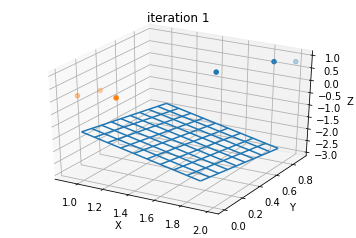

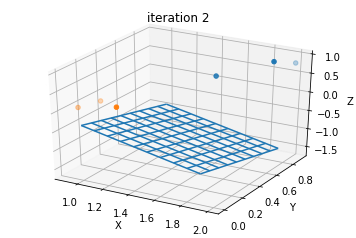

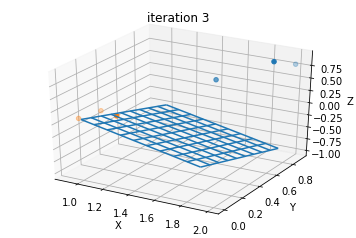

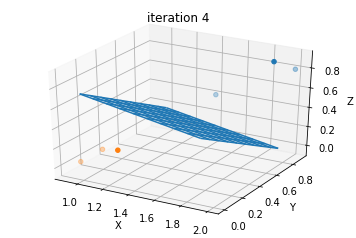

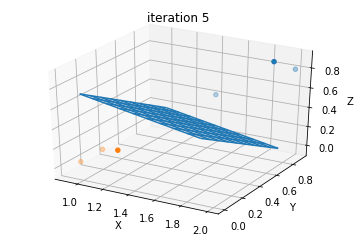

w =  [ 0.07  0.2   0.3 ]
w0 =  -0.3
it =  5


In [30]:
# train perceptron
nn = Perceptron(ploter=True)     
nn.train(data)

Now we can test a point to evaluate the accuracy of the classifier.

testData is of class  -1


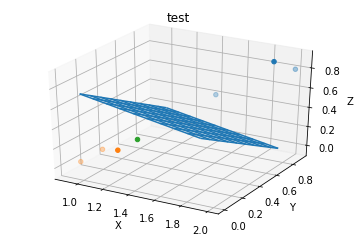

In [31]:
# test perceptron
testData = np.asarray([1.2, 0.3, 0.2])
print("testData is of class ", nn.evaluate(testData))

# plot results
nn.plot(data,'test',test=testData)

This is the Perceptron class:

In [32]:
import numpy as np 
import random
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

class Perceptron3d2c:
    # init preceptron
    def __init__(self,a = 0.1,b = 0.1,itMax = 100, ploter=False):
        # parameters
        self.a = a
        self.b = b
        self.itMax = itMax
        self.ploter = ploter
        # init weights
        self.w = np.zeros(3)    
        self.w0 = 0.
        # 2 classes (+1, -1)
        self.c = np.zeros(3)
    # train perceptron
    def train(self,data):
        it = 0
        # extract labels
        self.c = data[:,3]
        x = data[:,0:3]
        # random acces to data
        arr = list(range(len(x)))
        random.shuffle(arr)        
        while True:
            error = 0.
            it += 1
            for i in arr:
                g = self.c[i]*(np.dot(self.w,x[i]) + self.w0)
                if g < self.b:
                    self.w += self.a*self.c[i]*x[i]
                    self.w0 += self.a*self.c[i]
                    error += 1
            if self.ploter:
                self.plot(data,tit="iteration "+str(it))
            if error == 0 or it >= self.itMax:
                break;
        print("w = ",self.w)
        print("w0 = ",self.w0)
        print("it = ",it)
        if it == self.itMax:            
            print("Not converged")
    # evaluate
    def evaluate(self,test):
        g = (np.dot(self.w,test) + self.w0)
        if g > 0:
            return 1
        else:
            return -1    
    # plot 
    def plot(self,x,tit='',test=[]):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')  
        ax.scatter(
            [j for i, j in enumerate(x[:,0]) if x[i][3] == 1],
            [j for i, j in enumerate(x[:,1]) if x[i][3] == 1],
            [j for i, j in enumerate(x[:,2]) if x[i][3] == 1]
        )
        ax.scatter(
            [j for i, j in enumerate(x[:,0]) if x[i][3] == -1],
            [j for i, j in enumerate(x[:,1]) if x[i][3] == -1],
            [j for i, j in enumerate(x[:,2]) if x[i][3] == -1]
        )
        if len(test) != 0:
            ax.scatter(test[0],test[1],test[2])
        xp = np.arange(1,2,step=0.1)
        yp = np.arange(0,1,step=0.1)
        X, Y = np.meshgrid(xp, yp)
        Z = -(X*self.w[0] + Y*self.w[1] + self.w0)/self.w[2]
        ax.plot_wireframe(X,Y,Z)
        plt.title(tit)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z ')
        plt.show()

## Propsed tasks

- Try with a train data set that cannot be divided with a plane, for example set point [0.9,0.1, 0] to class 1. The algorithm will not converge without training errors (this is why we need a maxium number of iterations stop criteria), but the perceptron will be able to classify nevertheless.
- The optimal parameters of the perceptron (a, b) will depend on the data and must be adjusted (it will affect convergence).


## Author

Juan Sensio - juansensio03@gmail.com